In [48]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [49]:
sns.set_style("whitegrid", {'axes.grid' : True})
sns.set_palette("Set2")

In [50]:
import warnings
warnings.simplefilter(action = "ignore", category = RuntimeWarning)

In [47]:
credit_data = pd.read_excel("default_of_credit_card_clients.xls", skiprows = 1)

In [51]:
credit_data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [52]:
credit_data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [53]:
columns = ["id", "overall_credit", "gender", "education", "marital_status", "age", "rps_sept", "rps_aug",
          "rps_july","rps_june","rps_may","rps_april", "ba_sept", "ba_aug", "ba_july", "ba_june", "ba_april",
           "ba_may", "pp_sept", "pp_aug", "pp_july", "pp_june", "pp_may", "pp_april", "defaultp_next_month"]

In [54]:
credit_data.columns = columns

In [55]:
credit_data.describe()

,id,overall_credit,gender,education,marital_status,age,rps_sept,rps_aug,rps_july,rps_june,...,ba_june,ba_april,ba_may,pp_sept,pp_aug,pp_july,pp_june,pp_may,pp_april,defaultp_next_month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [56]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
id                     30000 non-null int64
overall_credit         30000 non-null int64
gender                 30000 non-null int64
education              30000 non-null int64
marital_status         30000 non-null int64
age                    30000 non-null int64
rps_sept               30000 non-null int64
rps_aug                30000 non-null int64
rps_july               30000 non-null int64
rps_june               30000 non-null int64
rps_may                30000 non-null int64
rps_april              30000 non-null int64
ba_sept                30000 non-null int64
ba_aug                 30000 non-null int64
ba_july                30000 non-null int64
ba_june                30000 non-null int64
ba_april               30000 non-null int64
ba_may                 30000 non-null int64
pp_sept                30000 non-null int64
pp_aug                 30000 non-null int64
pp_july    

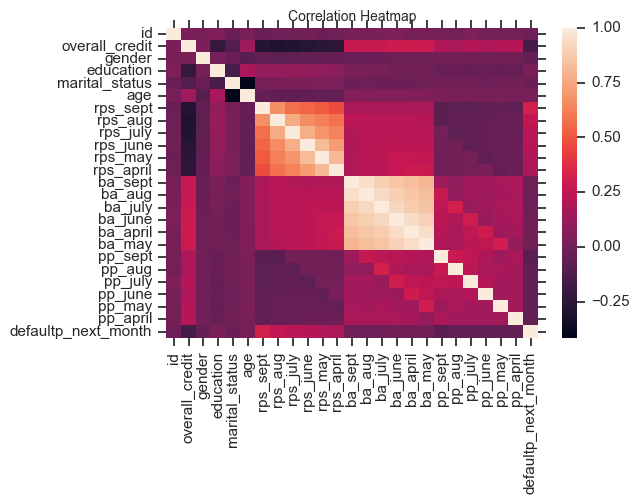

In [59]:
corr = credit_data.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)
plt.title( "Correlation Heatmap", fontsize = 10 )

In [60]:
credit_data['education'] = credit_data['education'].map({0: 'others', 5: 'others', 6: 'others', 1: 'graduate_school', 2: 'university', 3: 'high_school'})

In [61]:
eda_credit_data = credit_data

In [62]:
eda_credit_data['gender'] = eda_credit_data['gender'].map({1: 'male', 2: 'female'})

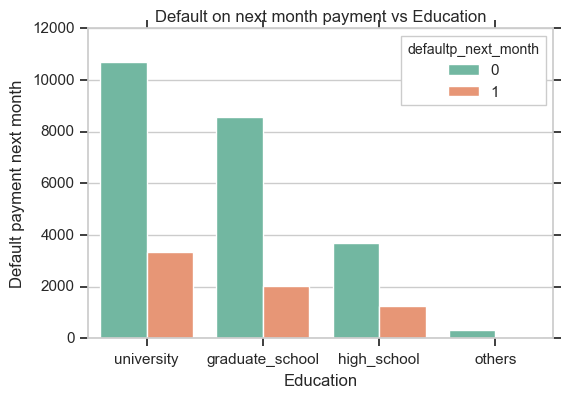

In [135]:
ax = sns.countplot(x = "education",
                   hue = "defaultp_next_month", data = eda_credit_data)
plt.title("Default on next month payment vs Education")
ax.set(xlabel='Education', ylabel='Default payment next month')


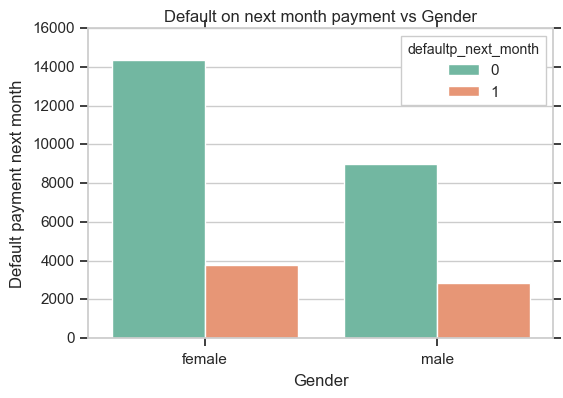

In [134]:
ax = sns.countplot(x = "gender",
                   hue = "defaultp_next_month", data = eda_credit_data)
plt.title("Default on next month payment vs Gender")
ax.set(xlabel='Gender', ylabel='Default payment next month')


In [133]:
eda_credit_data['marital_status'] = eda_credit_data['marital_status'].map({1: 'married', 2: 'single', 3: 'others', 0: 'others'})

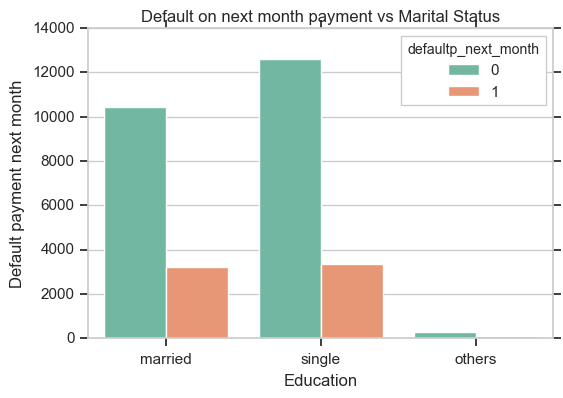

In [137]:
ax = sns.countplot(x = "marital_status",
                   hue = "defaultp_next_month", data = eda_credit_data)
plt.title("Default on next month payment vs Marital Status")
ax.set(xlabel='Education', ylabel='Default payment next month')


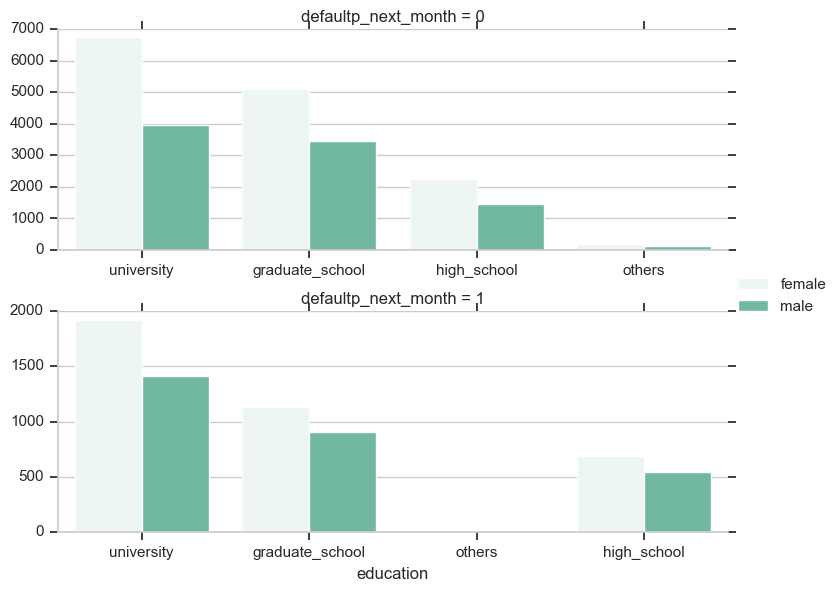

In [177]:
g = sns.FacetGrid(data = eda_credit_data, row = 'defaultp_next_month', sharex = False, sharey = False, aspect = 2.5)
g.map_dataframe(countplot, 'education', hue = 'gender')
g.add_legend()


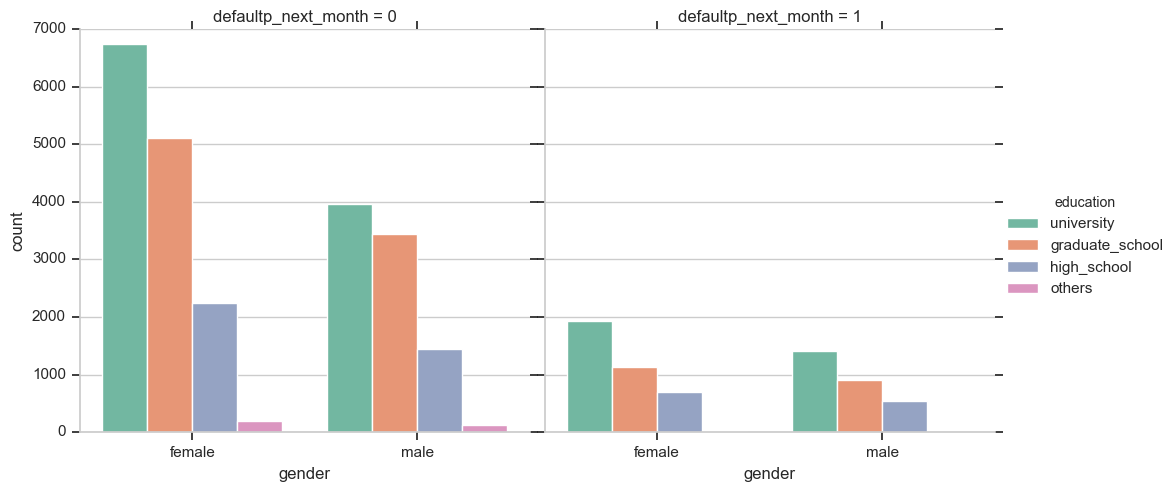

In [180]:
sns.catplot(x = "gender", hue = "education", 
            col = "defaultp_next_month",
            data = eda_credit_data, kind = "count")

### Appendix

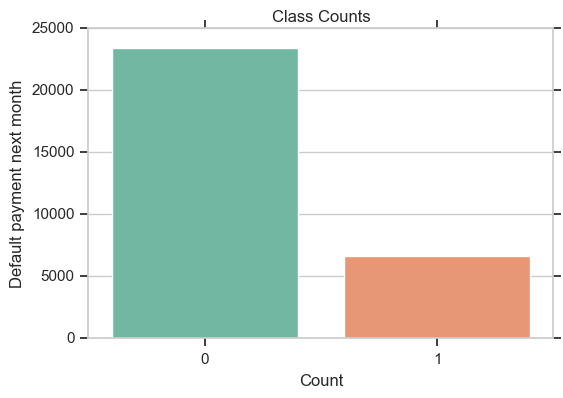

In [172]:
ax = sns.countplot(x = "defaultp_next_month", data = credit_data)
ax.set(xlabel='Count', ylabel='Default payment next month')
plt.title("Class Counts")

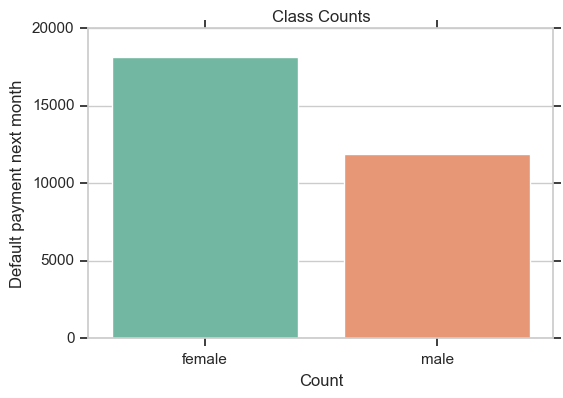

In [173]:
ax = sns.countplot(x = "gender", data = credit_data)
ax.set(xlabel='Count', ylabel='Default payment next month')
plt.title("Class Counts")

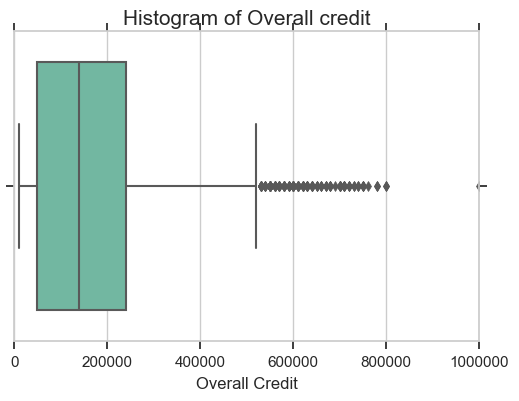

In [174]:
sns.boxplot( credit_data.overall_credit)
plt.title( "Histogram of Overall credit", fontsize = 15)
plt.xlabel( "Overall Credit")